### 交差検証
```
今回はモデルの汎化性を評価するための統計手法である交差検証について記事を書いてみました。
今まで何度かtrai_test_split関数で訓練セットとテストセットを分割する処理をしてきましたが、
交差検証はより正確な評価精度を出すことができます。
今回は2つの交差検証手法である「k分割交差検証(k-fold cross-validation)」と「層化k分割交差検証(stratified-fold cross-validation)」について用途やメリットを伝えられればと思います。

```

### k分割交差検証(k-fold cross-validation)とは
```
kは分割数で任意で決めることができます。もし、k=5と設定すればまずデータを5つの同じサイズに分割(fold)します。
次に分割数分モデルを訓練し評価します。5つに分割した場合、最初の1つをテストデータとして残り2,3,4,5でモデルを訓練し評価します。次は2つめをテストデータとして、残り1,3,4,5でモデルを訓練し、評価します。この一連の操作を分割数分繰り返し行うことで最終的に5つの精度を手にいれることができます。この5つの交差検証の平均をとり評価精度とします。実際に試してみたいと思います。
```

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import mglearn
from matplotlib import pyplot as plt
%matplotlib inline

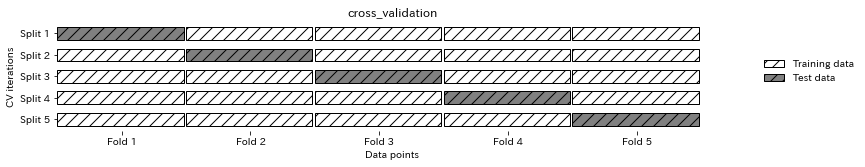

In [26]:
mglearn.plots.plot_cross_validation()

In [27]:
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg,iris.data,iris.target)
print("cross validation score{}".format(scores))
scores = cross_val_score(logreg,iris.data,iris.target,cv=5)
print("cross validation score{}".format(scores))
print("average cross validation score :{:.2f}".format(scores.mean()))

cross validation score[0.96078431 0.92156863 0.95833333]
cross validation score[1.         0.96666667 0.93333333 0.9        1.        ]
average cross validation score :0.96


```
デフォルトでは3分割で交差検証を行うので、5分割にしたい場合cv= 5とします。この交差検証の平均をとり評価精度とします。5分割では96%の評価精度を得ることができました。5分割で評価精度が90%から100%まで確認できる。これは分割間でばらつきが大きいことを意味しています。
```

### 交差検証のメリット・デメリット
##### メリット
```
交差検証のメリットは以下の通りです。

(1)　汎化性が高い
train_test_split関数を活用した場合に比べて、汎化性のある評価精度を得ることができます。train_test_split関数はデータをランダムに分割しますが、もしクラス分類が難しいデータが訓練データに入り、簡単なデータがテストデータに入った場合評価精度はとても高くなってしまいます。また逆の可能性も考えられます。
交差検証は分割数分モデルを構築し精度を出しているため、すべてのモデルに対して高い精度が出ないと交差検証の平均値は高くなりません。なので一般的にの汎化性を評価する場合は交差検証を用いることが一般的です。


(2) データをより効率的に扱えること
train_test_split関数を用いると75%を訓練データに、25%をテストデータに用いています。5分割で交差検証する場合データの4/5(80%)を訓練データに使っています。データが多いほどモデルは正確になります。

以上の理由からモデルの精度をみたいときは交差検証を使うのが一般的です。
```
#### デメリット
```
[1] 計算コスト
分割したk個のモデルを訓練するため、単純な分割よりも計算コストがかかります。
```

### 層化k分割交差検証
```
層化k分割交差検証は分類問題への活用に適した方法です。データセットをk個に分割する方法は必ずしもうまくいくとは限りません。分類の目的変数が偏っていた場合、正しい評価精度が分からないからです。実際にirisのデータセットで確認したいと思います。

```

In [28]:
iris = load_iris()
print("iris labels:\n{}".format(iris.target))

iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


```
明らかに偏っています。これを前から3分割したらどうなるでしょうか？
汎化性が全くなく精度は0になってしまうでしょう。このようなデータに対して層化k分割交差検証は各分割内のクラス比率が全体と同じになるようにします。
```

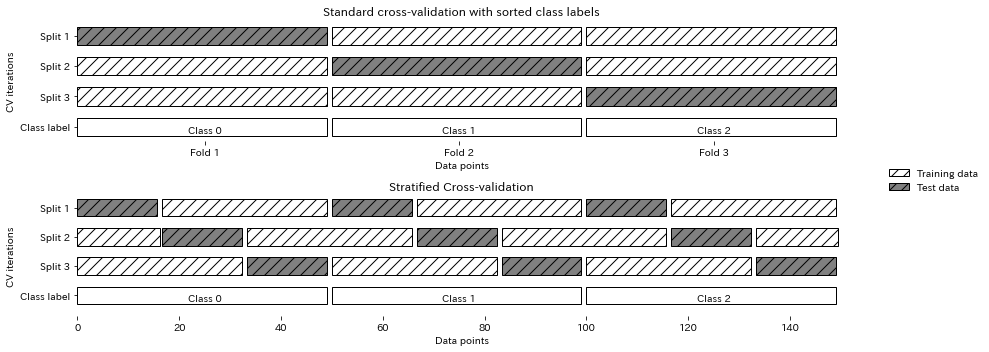

In [29]:
mglearn.plots.plot_stratified_cross_validation()

```
データがクラスラベル順に並んでいた場合の、標準的な交差検証と層化k分割交差検証を比べたものです。層化k分割交差検証はクラス内でk分割しています。3分割した場合、各クラスでテストデータを1、訓練データを2、3としています。このようにクラス単位でモデルの学習と評価を行う方法を層化k分割交差検証と呼びます。
```

### 活用用途
```
k分割交差検証と層化k分割交差検証の活用用途は以下の通りです。
[1]　k分割交差検証：予測問題
[2]　層化k分割交差検証：分類問題
sckit-learnでは回帰問題はk分割交差検証を、分類問題は層化k分割交差検証とはデフォルトで用いてくれます。
先ほどirisのデータセットを用いて3分割で評価精度が算出できていたのは、デフォルトで分類問題と判断し、層化k分割交差検証を適用させていたためです。
ほとんどの場合デフォルトで良いのですが、別の人が実行した場合を再現したいケースが考えられます。その場合はモジュールのkFold分割器をインポートしてみます。
irisのデータセットの分類問題に層化k分割交差検証ではなく、k分割交差検証適用してみましょう。
```

In [24]:
from sklearn.model_selection import KFold
iris = load_iris()
logreg = LogisticRegression()
kfold = KFold(n_splits=3)
print("cross validation score:\n{}".
      format(cross_val_score(logreg ,iris.data,iris.target,cv=kfold)))

cross validation score:
[0. 0. 0.]


```
見事評価精度が0になりました。Pythonで一発でできるようになりましたが、各モジュールがどのような仕組みで何をしているのか理解することはとても大切ですね。そうしないと、誤った精度を得てしまいます。
```